In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from imblearn.ensemble import BalancedRandomForestClassifier

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Text Cleaning and Preprocessing
class TextPreprocessor:
    def __init__(self):
        self.stopwords = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def transform(self, text):
        # Convert to lowercase
        text = text.lower()
        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Tokenization and lemmatization
        tokens = [self.lemmatizer.lemmatize(word) for word in text.split() if word not in self.stopwords]
        return ' '.join(tokens)

# Load the dataset
data = pd.read_csv('/content/SAH-labeled-dataset-July-20-9-cls.csv')  # Update with your dataset file name

# Drop rows with missing values in the 'description' and 'Counterspeech' columns
data.dropna(subset=['description', 'Denouncing'], inplace=True)

# Split the dataset into training and testing sets
text_train, text_test, counterspeech_train, counterspeech_test = train_test_split(
    data['description'],
    data['Denouncing'],
    test_size=0.2,
    random_state=42
)

# Text Cleaning and Preprocessing
preprocessor = TextPreprocessor()
cleaned_text_train = [preprocessor.transform(text) for text in text_train]
cleaned_text_test = [preprocessor.transform(text) for text in text_test]

# Word Embedding using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
features_train = vectorizer.fit_transform(cleaned_text_train)
features_test = vectorizer.transform(cleaned_text_test)

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(features_train, counterspeech_train)

# Predictions
predictions = rf_classifier.predict(features_test)

# Evaluation
print(classification_report(counterspeech_test, predictions))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


              precision    recall  f1-score   support

           0       0.85      0.98      0.91       308
           1       0.62      0.16      0.25        63

    accuracy                           0.84       371
   macro avg       0.74      0.57      0.58       371
weighted avg       0.81      0.84      0.80       371



Saving the ML model

In [ ]:
import joblib

# Save the trained BRF model to a file
model_filename = 'rf_classifier.joblib'
joblib.dump(rf_classifier, model_filename)
print(f"Trained RF model saved as '{model_filename}'")

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
import re


# Evaluation
print('Classification Report:')
print(classification_report(counterspeech_test, predictions))

print('Confusion Matrix:')
print(confusion_matrix(counterspeech_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       308
           1       0.62      0.16      0.25        63

    accuracy                           0.84       371
   macro avg       0.74      0.57      0.58       371
weighted avg       0.81      0.84      0.80       371

Confusion Matrix:
[[302   6]
 [ 53  10]]


Applying BRF for improving performance

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.para

Balanced Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       308
           1       0.47      0.62      0.53        63

    accuracy                           0.82       371
   macro avg       0.69      0.74      0.71       371
weighted avg       0.84      0.82      0.83       371

Confusion Matrix:
[[264  44]
 [ 24  39]]


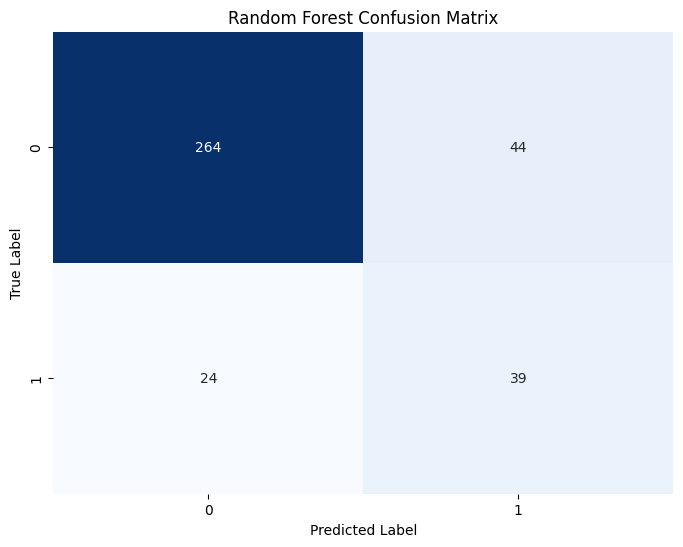

Trained RF model saved as 'brf_Denouncing.joblib'


In [27]:
from imblearn.ensemble import BalancedRandomForestClassifier
import matplotlib.pyplot as plt
# Balanced Random Forest Classifier
brf_classifier = BalancedRandomForestClassifier()
brf_classifier.fit(features_train, counterspeech_train)

# Predictions for Balanced Random Forest
brf_predictions = brf_classifier.predict(features_test)

# Evaluation for Balanced Random Forest
print("Balanced Random Forest Classification Report:")
print(classification_report(counterspeech_test, brf_predictions))

print("Confusion Matrix:")
brf_cm = confusion_matrix(counterspeech_test, brf_predictions)
print(brf_cm)
plt.figure(figsize=(8, 6))
sns.heatmap(brf_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

import joblib

# Save the trained BRF model to a file
model_filename = 'brf_Denouncing.joblib'
joblib.dump(brf_classifier, model_filename)
print(f"Trained RF model saved as '{model_filename}'")



In [12]:
#Adding other models
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(features_train, counterspeech_train)
nb_predictions = nb_classifier.predict(features_test)

print("Naive Bayes Classifier:")
print(classification_report(counterspeech_test, nb_predictions))
print()

# Support Vector Machine (SVM) Classifier
svm_classifier = SVC()
svm_classifier.fit(features_train, counterspeech_train)
svm_predictions = svm_classifier.predict(features_test)

print("Support Vector Machine (SVM) Classifier:")
print(classification_report(counterspeech_test, svm_predictions))
print()

# Neural Network (Multi-Layer Perceptron) Classifier using Keras
from keras.models import Sequential
from keras.layers import Dense

# Convert target labels to one-hot encoding
num_classes = len(np.unique(counterspeech_train))
counterspeech_train_encoded = np.eye(num_classes)[counterspeech_train]
counterspeech_test_encoded = np.eye(num_classes)[counterspeech_test]

# Build the neural network model
nn_model = Sequential()
nn_model.add(Dense(128, activation='relu', input_shape=(features_train.shape[1],)))
nn_model.add(Dense(num_classes, activation='softmax'))
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
nn_model.fit(features_train, counterspeech_train_encoded, epochs=10, batch_size=32, verbose=1)

# Predictions
nn_predictions = np.argmax(nn_model.predict(features_test), axis=-1)

print("Neural Network (Multi-Layer Perceptron) Classifier:")
print(classification_report(counterspeech_test, nn_predictions))


Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       308
           1       0.77      0.16      0.26        63

    accuracy                           0.85       371
   macro avg       0.81      0.57      0.59       371
weighted avg       0.84      0.85      0.81       371


Support Vector Machine (SVM) Classifier:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       308
           1       0.69      0.17      0.28        63

    accuracy                           0.85       371
   macro avg       0.77      0.58      0.60       371
weighted avg       0.83      0.85      0.81       371


Epoch 1/10
47/47 [==============================] - 1s 8ms/step - loss: 0.5043 - accuracy: 0.8658
Epoch 2/10
47/47 [==============================] - 0s 10ms/step - loss: 0.2822 - accuracy: 0.8705
Epoch 3/10
47/47 [==============================] - 0s 6ms/step - loss: 0.2188 - a

Running Confusion Matrix on all the models

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from imblearn.ensemble import BalancedRandomForestClassifier


# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(features_train, counterspeech_train)
rf_predictions = rf_classifier.predict(features_test)

print("Random Forest Classifier:")
print(classification_report(counterspeech_test, rf_predictions))
print("Confusion Matrix:")
rf_cm = confusion_matrix(counterspeech_test, rf_predictions)
print(rf_cm)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(features_train, counterspeech_train)
nb_predictions = nb_classifier.predict(features_test)

print("Naive Bayes Classifier:")
print(classification_report(counterspeech_test, nb_predictions))
print("Confusion Matrix:")
nb_cm = confusion_matrix(counterspeech_test, nb_predictions)
print(nb_cm)
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Support Vector Machine (SVM) Classifier
svm_classifier = SVC()
svm_classifier.fit(features_train, counterspeech_train)
svm_predictions = svm_classifier.predict(features_test)

print("Support Vector Machine (SVM) Classifier:")
print(classification_report(counterspeech_test, svm_predictions))
print("Confusion Matrix:")
svm_cm = confusion_matrix(counterspeech_test, svm_predictions)
print(svm_cm)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Neural Network (Multi-Layer Perceptron) Classifier using Keras
nn_predictions = np.argmax(nn_model.predict(features_test), axis=-1)

print("Neural Network (Multi-Layer Perceptron) Classifier:")
print(classification_report(counterspeech_test, nn_predictions))
print("Confusion Matrix:")
nn_cm = confusion_matrix(counterspeech_test, nn_predictions)
print(nn_cm)
plt.figure(figsize=(8, 6))
sns.heatmap(nn_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Improving the performance of the model.
1# Hyperparameter tuning. (Found no change)

Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       308
           1       0.77      0.16      0.26        63

    accuracy                           0.85       371
   macro avg       0.81      0.57      0.59       371
weighted avg       0.84      0.85      0.81       371

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       308
           1       0.62      0.16      0.25        63

    accuracy                           0.84       371
   macro avg       0.74      0.57      0.58       371
weighted avg       0.81      0.84      0.80       371

Confusion Matrix:
[[302   6]
 [ 53  10]]


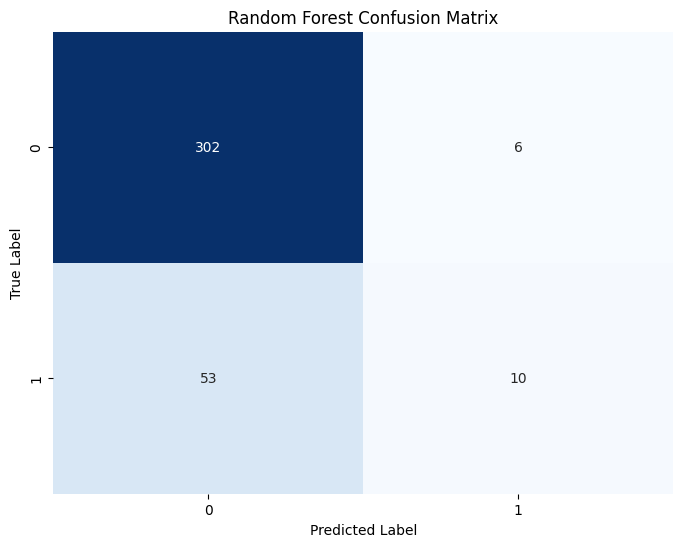

In [14]:
#Hyperparameter tuning in RF model
from sklearn.model_selection import train_test_split, GridSearchCV
# Hyperparameter Tuning with Grid Search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3)
grid_search.fit(features_train, counterspeech_train)

best_rf_classifier = grid_search.best_estimator_

# Predictions
predictions = best_rf_classifier.predict(features_test)

# Evaluation
print("Best Parameters:", grid_search.best_params_)
print(classification_report(counterspeech_test, predictions))

print("Random Forest Classifier:")
print(classification_report(counterspeech_test, rf_predictions))
print("Confusion Matrix:")
rf_cm = confusion_matrix(counterspeech_test, rf_predictions)
print(rf_cm)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



Checking Data splitting to improve performance.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import nltk
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('wordnet')

# Text Cleaning and Preprocessing
class TextPreprocessor:
    def __init__(self):
        self.stopwords = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def transform(self, text):
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        tokens = [self.lemmatizer.lemmatize(word) for word in text.split() if word not in self.stopwords]
        return ' '.join(tokens)

# Load the dataset
data = pd.read_csv('/content/SAH-labeled-dataset-July-20-9-cls.csv')

data.dropna(subset=['description', 'Denouncing'], inplace=True)

# Split the dataset into classes
minority_class = data[data['Denouncing'] == 1]
majority_class = data[data['Denouncing'] == 0]

# Split the majority class into training and testing sets
majority_train, majority_test = train_test_split(majority_class, test_size=0.2, random_state=42)

# Combine the minority class with the training set of the majority class
train_data = pd.concat([minority_class, majority_train], axis=0)

# Shuffle the training data
train_data = train_data.sample(frac=1, random_state=42)

# Prepare text and labels for training and testing
text_train = train_data['description']
text_test = majority_test['description']
denouncing_train = train_data['Denouncing']
denouncing_test = majority_test['Denouncing']

preprocessor = TextPreprocessor()
cleaned_text_train = [preprocessor.transform(text) for text in text_train]
cleaned_text_test = [preprocessor.transform(text) for text in text_test]

vectorizer = TfidfVectorizer()
features_train = vectorizer.fit_transform(cleaned_text_train)
features_test = vectorizer.transform(cleaned_text_test)

# Train your classifier (e.g., Balanced Random Forest Classifier)
brf_classifier = BalancedRandomForestClassifier()
brf_classifier.fit(features_train, denouncing_train)

# Make predictions
brf_predictions = brf_classifier.predict(features_test)

# Evaluate the model
print("Balanced Random Forest Classification Report:")
print(classification_report(denouncing_test, brf_predictions))

# Confusion Matrix
brf_cm = confusion_matrix(denouncing_test, brf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(brf_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Balanced Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Saving the RF model

In [ ]:
import joblib

# Save the trained RF model to a file
model_filename = 'rf_consequences.joblib'
joblib.dump(best_rf_classifier, model_filename)
print(f"Trained RF model saved as '{model_filename}'")

Trained RF model saved as 'rf_consequences.joblib'
